In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import tr_mse, tr_mse_nn_output

Using TensorFlow backend.


In [5]:
models_path = 'trained_models/sand'
trend_num = 2
nn_name = 'nf32'
W = 256
H = 256

In [6]:
verification_path = models_path + '/trend' + str(trend_num) + '/' + nn_name + '/verification'
nn_mse, nn_err, nn_tr, tr_side1, tr_side2, tr_pan  = tr_mse_nn_output(verification_path, r=3)

NN output: 100%|██████████| 10/10 [00:01<00:00,  6.25it/s]


Dir already exist
Metrics saved successfully.


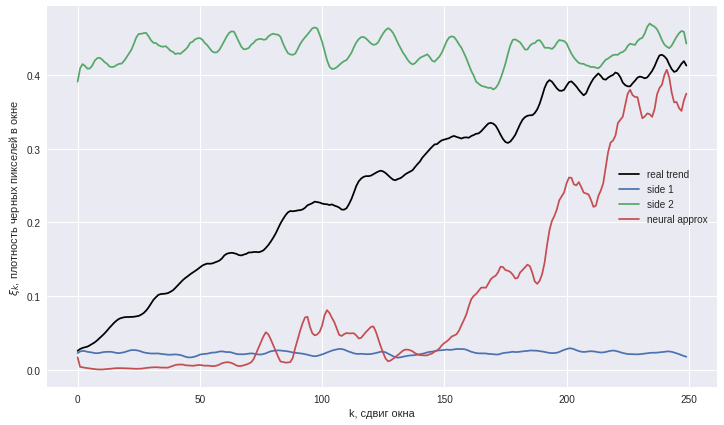

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(tr_pan, label='real trend', color='black')
plt.plot(tr_side1, label='side 1')
plt.plot(tr_side2, label='side 2')
plt.plot(nn_tr, label='neural approx')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig(verification_path + '/metrics' + '/tr_1.png')

In [123]:
tr_side1 = np.load('../text/graphs/8-results/sand-trend2/tr_s1.npy')
tr_side2 = np.load('../text/graphs/8-results/sand-trend2/tr_s2.npy')
tr_pan = np.load('../text/graphs/8-results/sand-trend2/tr_pan.npy')
tr_nf8 = np.load('trained_models/sand/trend2/nf8/verification/metrics/nn_tr.npy')
tr_nf16 = np.load('trained_models/sand/trend2/nf16/verification/metrics/nn_tr.npy')
tr_nf16woU = np.load('trained_models/sand/trend2/nf16_3x3_woUnet/verification/metrics/nn_tr.npy')
tr_nf32 = np.load('trained_models/sand/trend2/nf32/verification/metrics/nn_tr.npy')

In [124]:
K = 1 / tr_side2.mean()

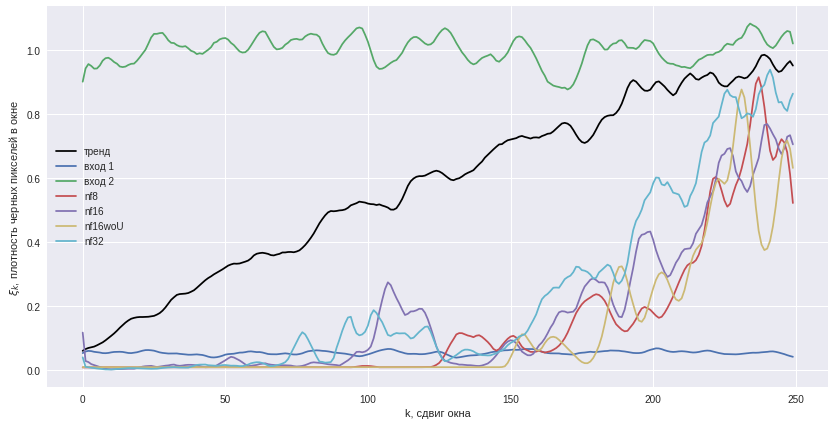

In [125]:
plt.figure(figsize=(14, 7))
plt.plot(K*tr_pan, label='тренд', color='black')
plt.plot(K*tr_side1, label='вход 1')
plt.plot(K*tr_side2, label='вход 2')
plt.plot(K*tr_nf8, label='nf8')
plt.plot(K*tr_nf16, label='nf16')
plt.plot(K*tr_nf16woU, label='nf16woU')
plt.plot(K*tr_nf32, label='nf32')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig('../text/graphs/8-results/sand-trend2/results.png')

In [129]:
((K*tr_pan - K*tr_nf32)**2).mean()

0.14589180558344936

In [120]:
tr_side1 = np.load('../text/graphs/8-results/sand-trend8/tr_s1.npy')
tr_side2 = np.load('../text/graphs/8-results/sand-trend8/tr_s2.npy')
tr_pan = np.load('../text/graphs/8-results/sand-trend8/tr_pan.npy')
tr_nf32e5 = np.load('trained_models/sand/trend8/nf32_dropout_eta5/verification/metrics/nn_tr.npy')
tr_nf64e1 = np.load('trained_models/sand/trend8/nf64_eta1_3x3_rmsprop_3stop/verification/metrics/nn_tr.npy')
tr_nf64e5 = np.load('trained_models/sand/trend8/nf64_eta5_3x3_rmsprop/verification/metrics/nn_tr.npy')
tr_nf64e10 = np.load('trained_models/sand/trend8/nf64_eta10_rmsprop/verification/metrics/nn_tr.npy')

In [121]:
K = 1 / tr_side2.mean()

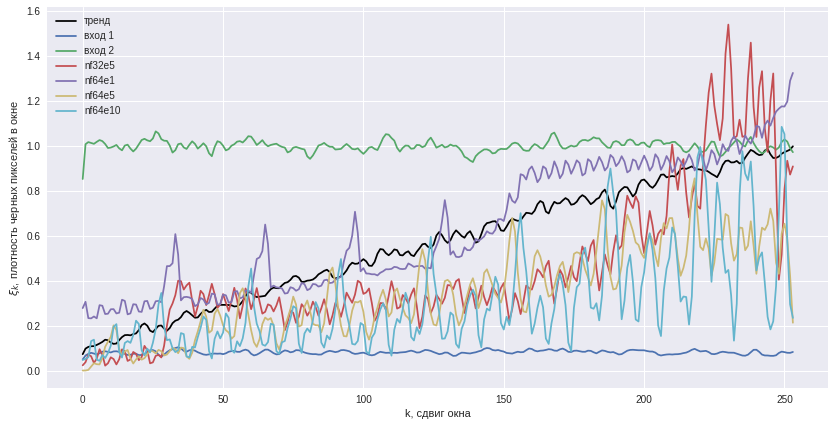

In [122]:
plt.figure(figsize=(14, 7))
plt.plot(K*tr_pan, label='тренд', color='black')
plt.plot(K*tr_side1, label='вход 1')
plt.plot(K*tr_side2, label='вход 2')
plt.plot(K*tr_nf32e5, label='nf32e5')
plt.plot(K*tr_nf64e1, label='nf64e1')
plt.plot(K*tr_nf64e5, label='nf64e5')
plt.plot(K*tr_nf64e10, label='nf64e10')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig('../text/graphs/8-results/sand-trend8/results.png')

In [109]:
((K*tr_pan - K*tr_nf64e10)**2).mean()

0.11167743655468033

In [111]:
tr_side1 = np.load('../text/graphs/8-results/dust-trend1/tr_side1.npy')
tr_side2 = np.load('../text/graphs/8-results/dust-trend1/tr_side2.npy')
tr_pan = np.load('../text/graphs/8-results/dust-trend1/tr_pan.npy')
tr_nf64e1 = np.load('trained_models/dust/trend1/nf64_eta1_3x3/verification/metrics/nn_tr.npy')
tr_nf64e5 = np.load('trained_models/dust/trend1/nf64_eta5_3x3_2/verification/metrics/nn_tr.npy')
tr_nf100e0 = np.load('trained_models/dust/trend1/nf100_eta0_3x3/verification/metrics/nn_tr.npy')
tr_nf100e5 = np.load('trained_models/dust/trend1/nf100_eta5_3x3/verification/metrics/nn_tr.npy')

In [112]:
K = 1 / tr_side2.mean()

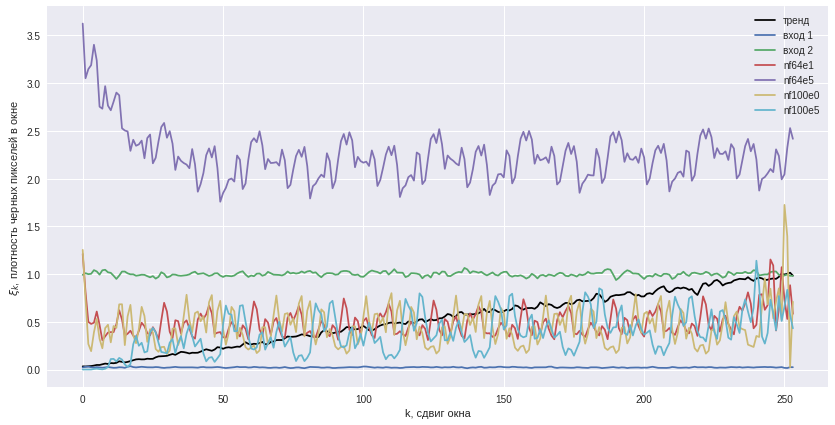

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(K*tr_pan, label='тренд', color='black')
plt.plot(K*tr_side1, label='вход 1')
plt.plot(K*tr_side2, label='вход 2')
plt.plot(K*tr_nf64e1, label='nf64e1')
plt.plot(K*tr_nf64e5, label='nf64e5')
plt.plot(K*tr_nf100e0, label='nf100e0')
plt.plot(K*tr_nf100e5, label='nf100e5')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig('../text/graphs/8-results/dust-trend1/results.png')

In [114]:
((K*tr_pan - K*tr_nf100e5)**2).mean()

0.082655939330325154